In [1]:
%matplotlib inline

In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [1]:
import sys
import os
import random
import itertools
import h5py

import sklearn.manifold as manifold
import sklearn.cluster as cluster

import numpy as np
import pandas as pd
from PIL import Image

import matplotlib
from matplotlib.pyplot import imshow
matplotlib.rcParams['figure.figsize'] = [18, 24]


import plotly.offline as plotly
import plotly.graph_objs as go
plotly.init_notebook_mode(connected=True)

sys.path.insert(0,'..')
from utils import generateFilePathStr

# Basic Functions

In [2]:
def display_image(scene):
    image = Image.open(generateFilePathStr(scene, 'preproc', 'visible'))
    imshow(np.asarray(image))


def get_dataset(images, n, h5F):
    grid_size = 16
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B9', 'BQA']
    scene_list = []
    x_list = []
    y_list = []
    dataset = np.empty((
        len(images) * n,
        len(bands) * grid_size ** 2
    ))

    j = 0
    for sceneid in images:
        print "Generating sample for {}".format(sceneid)
        for _ in range(n):
            subimage = np.array(0)
            while (subimage == 0).any():
                dim = h5F[sceneid][bands[0]].shape
                subimage = np.empty((len(bands), grid_size, grid_size))
                x = random.randint(grid_size / 2, dim[0] - grid_size / 2 - 1)
                y = random.randint(grid_size / 2, dim[1] - grid_size / 2 - 1)

                for i, b in enumerate(bands):
                    subimage[i] = h5F[sceneid][b][
                        x - grid_size / 2 : x + grid_size / 2,
                        y - grid_size / 2 : y + grid_size / 2
                    ]

            dataset[j] = subimage.flatten()
            scene_list.append(sceneid)
            x_list.append(x)
            y_list.append(y)
            j += 1
        
    reference_df = pd.DataFrame({
        'sceneid': scene_list,
        'x': x_list,
        'y': y_list
    })
    
    return dataset, reference_df

# Generating Dataset

In [132]:
with h5py.File(generateFilePathStr(kind = 'database'), 'r') as h5F:
    data, reference_df = get_dataset(5000, h5F)

Generating sample for LC80140312016209LGN00
Generating sample for LC80170222015211LGN00
Generating sample for LC80220032014259LGN00
Generating sample for LC80281192015304LGN00
Generating sample for LC80300082016257LGN00
Generating sample for LC80300102014139LGN00
Generating sample for LC80591142013355LGN00
Generating sample for LC80642352016175LGN00
Generating sample for LC80660022014231LGN00
Generating sample for LC80700692016073LGN00
Generating sample for LC80711202015333LGN00
Generating sample for LC80720172014305LGN00
Generating sample for LC81060552014176LGN00
Generating sample for LC81100152013105LGN01
Generating sample for LC81260292015063LGN00
Generating sample for LC81380222017104LGN00
Generating sample for LC81450432015004LGN00
Generating sample for LC81480442015185LGN00
Generating sample for LC81481092013355LGN00
Generating sample for LC81490342016035LGN00
Generating sample for LC81510162015142LGN00
Generating sample for LC81640142016300LGN00
Generating sample for LC81770362

# Exploration

In [33]:
tsne = manifold.TSNE(learning_rate=1000)
km = cluster.KMeans(2)

## LC80140312016209LGN00

In [38]:
with h5py.File(generateFilePathStr(kind = 'database'), 'r') as h5F:
    dataset, reference_df = get_dataset(['LC81880242016116LGN00'], 500000, h5F)

Generating sample for LC81880242016116LGN00


In [39]:
cluster_labels = km.fit_predict(dataset[reference_df[reference_df['sceneid'] == 'LC81880242016116LGN00'].index])

In [43]:
group1 = reference_df[reference_df['sceneid'] == 'LC81880242016116LGN00'][cluster_labels==0][['x', 'y']].values
group2 = reference_df[reference_df['sceneid'] == 'LC81880242016116LGN00'][cluster_labels==1][['x', 'y']].values
image = np.array(Image.open(generateFilePathStr('LC81880242016116LGN00', 'preproc', 'visible')))


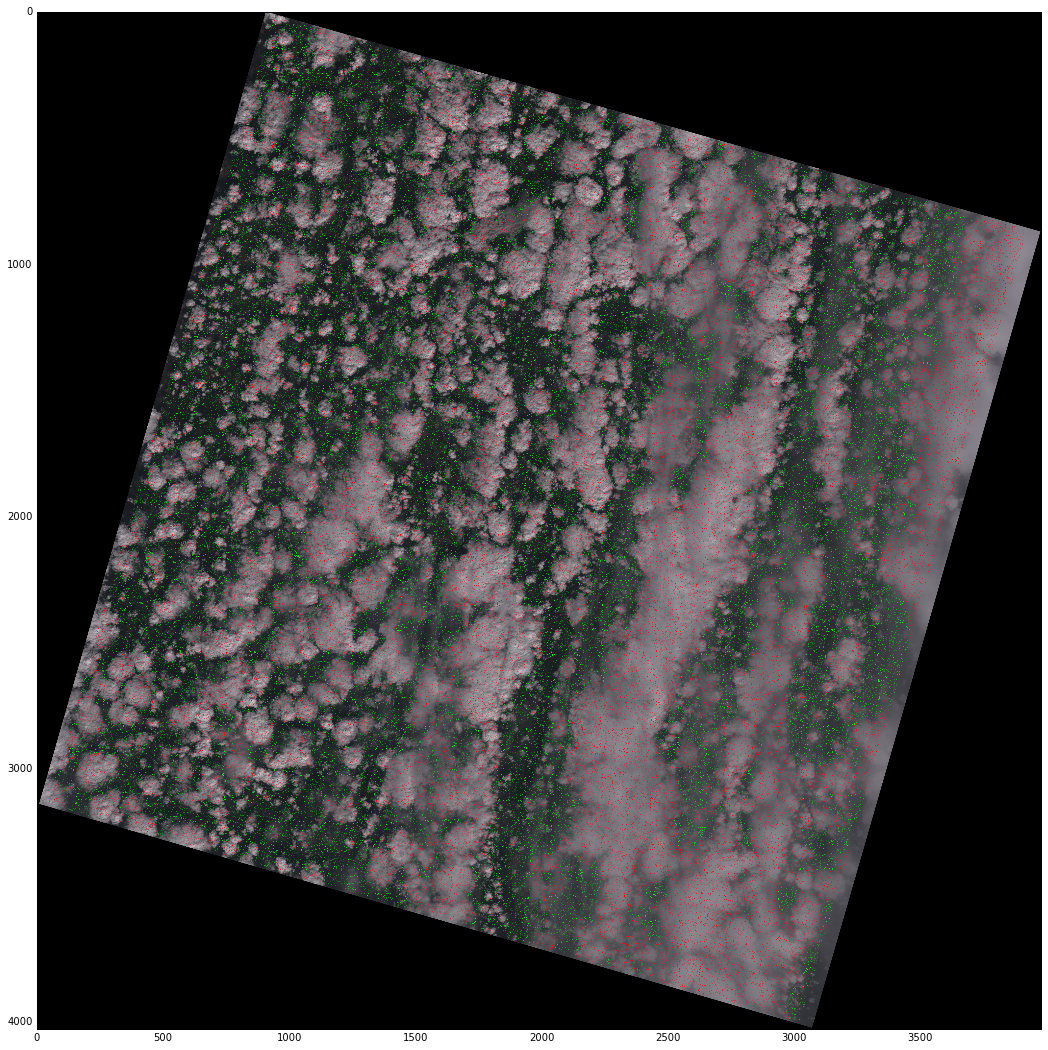

In [47]:
for i in range(group1.shape[0]):
    try:
        image[group1[i,0], group1[i, 1], :] = np.array([255, 0, 0])
        image[group2[i,0], group2[i, 1], :] = np.array([0, 255, 0])
    except: pass
imshow(np.asarray(image))